# Tutorial 4, Question 1: gradient descent learning

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt

In [2]:
lr = 0.05
num_epochs = 5000

In [3]:
# training data
X = torch.tensor(np.array([[1.0, 3.0], [-2.0, -2.0]]))
Y = torch.tensor(np.array([[0.0, 1.0], [1.0, 0.0]]))

print('x: %s, y: %s'%(X.numpy(), Y.numpy()))

x: [[ 1.  3.]
 [-2. -2.]], y: [[0. 1.]
 [1. 0.]]


In [4]:
V_init = [[1.0, 1.0], [0, -2]]
c_init = [-2.0, 3.0]
W_init = [[1.0, 2.0],[-2.0, 0]]
b_init = [3.0, -1.0]

In [5]:
class Two_Layer_DNN():
  def __init__(self):
    self.V = torch.tensor(V_init, dtype=torch.double)
    self.c = torch.tensor(c_init, dtype=torch.double)
    self.W = torch.tensor(W_init, dtype=torch.double)
    self.b = torch.tensor(b_init, dtype=torch.double)

  def __call__(self, x):
    z = torch.matmul(x, self.W) + self.b
    h = torch.sigmoid(z)
    u = torch.matmul(h, self.V) + self.c
    y = torch.sigmoid(u)
    return z, h, u, y

In [6]:
def loss(targets, outputs):
    return torch.mean(torch.square(targets - outputs))

In [7]:
def train(model, inputs, d, learning_rate):
    z, h, u, y = model(inputs)
    dy = y*(1-y)
    grad_u = -(d - y)*dy
    grad_V = torch.matmul(torch.transpose(h, 0, 1), grad_u)
    grad_c = torch.sum(grad_u, axis=0)

    dh = h*(1-h)
    grad_z = torch.matmul(grad_u, torch.transpose(model.V, 0, 1))*dh
    grad_W = torch.matmul(torch.transpose(inputs, 0, 1), grad_z)
    grad_b = torch.sum(grad_z, axis=0)

    model.W -= learning_rate*grad_W
    model.b -= learning_rate*grad_b
    model.V -= learning_rate*grad_V
    model.c -= learning_rate*grad_c
    
    return dy, grad_u, dh, grad_z

In [8]:
model = Two_Layer_DNN()

print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

W = [[ 1.  2.]
 [-2.  0.]], b = [ 3. -1.]
V = [[ 1.  1.]
 [ 0. -2.]], c = [-2.  3.]


In [9]:
err = []
for epoch in range(num_epochs):
    
    z_, h_, u_, y_ = model(X)
    cost_ = loss(Y, y_)
    dy_, grad_u_, dh_, grad_z_ = train(model, X, Y, lr)
    
    err.append(cost_)

    if epoch == 0:
        print('epoch: {}'.format(epoch+1))
        print('z: {}'.format(z_))
        print('h: {}'.format(h_))
        print('u: {}'.format(u_))
        print('y: {}'.format(y_))
        print('dy: {}'.format(dy_))
        print('grad_u: {}'.format(grad_u_))
        print('dh: {}'.format(dh_))
        print('grad_z:{}'.format(grad_z_))
        print('cost: {}'.format(cost_))
        print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
        print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))
                    
    if not epoch%100:
        print('epoch:{}, error: {}'.format(epoch,err[epoch]))

epoch: 1
z: tensor([[-2.,  1.],
        [ 5., -5.]], dtype=torch.float64)
h: tensor([[0.1192, 0.7311],
        [0.9933, 0.0067]], dtype=torch.float64)
u: tensor([[-1.8808,  1.6571],
        [-1.0067,  3.9799]], dtype=torch.float64)
y: tensor([[0.1323, 0.8398],
        [0.2676, 0.9817]], dtype=torch.float64)
dy: tensor([[0.1148, 0.1345],
        [0.1960, 0.0180]], dtype=torch.float64)
grad_u: tensor([[ 0.0152, -0.0215],
        [-0.1435,  0.0177]], dtype=torch.float64)
dh: tensor([[0.1050, 0.1966],
        [0.0066, 0.0066]], dtype=torch.float64)
grad_z:tensor([[-0.0007,  0.0085],
        [-0.0008, -0.0002]], dtype=torch.float64)
cost: 0.3857922619041111
W = [[ 9.99949679e-01  1.99955297e+00]
 [-1.99998360e+00 -1.29409093e-03]], b = [ 3.0000752  -1.00041178]
V = [[ 1.00703881e+00  9.99250433e-01]
 [-5.07093853e-04 -1.99921852e+00]], c = [-1.99358199  3.0001932 ]
epoch:0, error: 0.3857922619041111
epoch:100, error: 0.3058651282725495
epoch:200, error: 0.2797513882817207
epoch:300, error: 

In [10]:
print('W = {}, b = {}'.format(model.W.numpy(), model.b.numpy()))
print('V = {}, c = {}'.format(model.V.numpy(), model.c.numpy()))

_, _, _, y_ = model(X)
mse = loss(Y, y_)

print('y: {}'.format(y_))
print('error: {}'.format(mse))

W = [[ 0.62506067  0.60035651]
 [-2.99956491 -1.99248792]], b = [ 2.71900048 -0.74481158]
V = [[ 4.97482301 -3.46352222]
 [ 0.24645499 -2.37263065]], c = [-2.42727341  2.56119537]
y: tensor([[0.0825, 0.9272],
        [0.9406, 0.0474]], dtype=torch.float64)
error: 0.004469837066944355


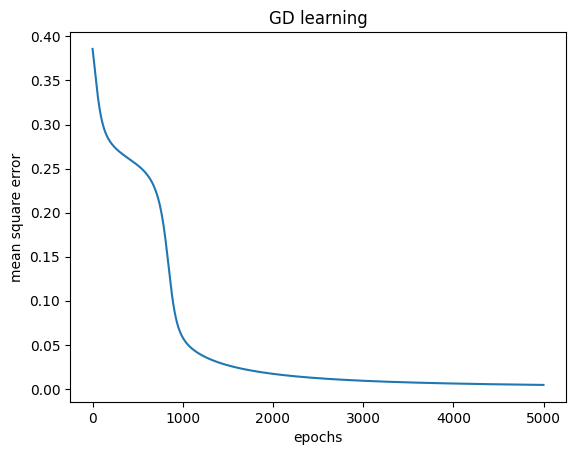

In [11]:
# plot learning curves
plt.figure(1)
plt.plot(range(num_epochs), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('GD learning')